<a href="https://colab.research.google.com/github/MI-HAWK/iPhone-XR-Customer-Feedback-Analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/apple_iphone_11_reviews.csv'
df = pd.read_csv(file_path)

print("Original Data:")
df.head()

Mounted at /content/drive
Original Data:


,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [3]:
print("\nData Info:")
df.info()

# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            5010 non-null   int64 
 1   product          5010 non-null   object
 2   helpful_count    5010 non-null   object
 3   total_comments   5010 non-null   int64 
 4   url              5010 non-null   object
 5   review_country   5010 non-null   object
 6   reviewed_at      5010 non-null   object
 7   review_text      5007 non-null   object
 8   review_rating    5010 non-null   object
 9   product_company  5010 non-null   object
 10  profile_name     5010 non-null   object
 11  review_title     5008 non-null   object
dtypes: int64(2), object(10)
memory usage: 469.8+ KB

Missing Values:
index              0
product            0
helpful_count      0
total_comments     0
url                0
review_country     0
reviewed_at        0
review_text        3
review_rating

In [4]:
# Drop rows where the review text or title is missing
df.dropna(subset=['review_text', 'review_title'], inplace=True)
print(df.isnull().sum())

index              0
product            0
helpful_count      0
total_comments     0
url                0
review_country     0
reviewed_at        0
review_text        0
review_rating      0
product_company    0
profile_name       0
review_title       0
dtype: int64


In [5]:
# Convert 'reviewed_at' to a datetime object
df['reviewed_at'] = pd.to_datetime(df['reviewed_at'])

In [6]:
# Removing unnecessary columns
df.drop(columns=['product', 'product_company', 'review_country', 'url', 'profile_name'], inplace=True)

In [7]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nFound {duplicate_count} duplicate reviews.")

# Drop duplicate rows
df.drop_duplicates(inplace=True)


Found 0 duplicate reviews.


In [8]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get English stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
df['cleaned_review_text'] = df['review_text'].apply(preprocess_text)
df['cleaned_review_title'] = df['review_title'].apply(preprocess_text)

print("\nData after cleaning and preprocessing:")
df.head()


Data after cleaning and preprocessing:


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,index,helpful_count,total_comments,reviewed_at,review_text,review_rating,review_title,cleaned_review_text,cleaned_review_title
0,0,"5,087 people found this helpful",24,2018-12-12,NOTE:,3.0 out of 5 stars,"Which iPhone you should Purchase ? iPhone 8, X...",note,iphone purchase iphone 8 x xs xr
1,1,"2,822 people found this helpful",6,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Don't buy iPhone xr from Amazon.,bad experience iphone xr phone back camera fou...,dont buy iphone xr amazon
2,2,"1,798 people found this helpful",0,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Happy with the purchase,amazing phone amazing camera coming iphone 7 p...,happy purchase
3,3,"1,366 people found this helpful",14,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Amazon is not an apple authorised reseller. Pl...,got iphone xr today product looks amazing unfo...,amazon apple authorised reseller please take note
4,4,536 people found this helpful,5,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Excellent Battery life and buttery smooth UI,ive android user life decided try iphone xr io...,excellent battery life buttery smooth ui


In [9]:
df['review_rating'] = df['review_rating'].str.split(' ', expand=True)[0]

# Converting the extracted string "1.0" into an integer 1.
df['review_rating'] = df['review_rating'].astype(float).astype(int)

df.head()

,index,helpful_count,total_comments,reviewed_at,review_text,review_rating,review_title,cleaned_review_text,cleaned_review_title
0,0,"5,087 people found this helpful",24,2018-12-12,NOTE:,3,"Which iPhone you should Purchase ? iPhone 8, X...",note,iphone purchase iphone 8 x xs xr
1,1,"2,822 people found this helpful",6,2018-11-17,Very bad experience with this iPhone xr phone....,1,Don't buy iPhone xr from Amazon.,bad experience iphone xr phone back camera fou...,dont buy iphone xr amazon
2,2,"1,798 people found this helpful",0,2019-01-27,Amazing phone with amazing camera coming from ...,5,Happy with the purchase,amazing phone amazing camera coming iphone 7 p...,happy purchase
3,3,"1,366 people found this helpful",14,2019-05-02,So I got the iPhone XR just today. The product...,1,Amazon is not an apple authorised reseller. Pl...,got iphone xr today product looks amazing unfo...,amazon apple authorised reseller please take note
4,4,536 people found this helpful,5,2019-05-24,I've been an android user all my life until I ...,5,Excellent Battery life and buttery smooth UI,ive android user life decided try iphone xr io...,excellent battery life buttery smooth ui


In [10]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=1ea65425496919633f3e431ef69398c694e3e014e602133a280cc91ca4b9f40d
  Stored in directory: /root/.cache/pip/wheels/5b/79/fb/d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number


In [11]:
import re
from word2number import w2n

def convert_helpful_count(text):
    """
    Converting the 'helpful_count' string to an integer,
    handling both word-based numbers and digit-based numbers.
    """
    if not isinstance(text, str):
        return 0 #Return 0 if the input is not a string

    # Isolate the part of the string that contains the number
    match = re.search(r'(.*)(?:person|people)', text, re.IGNORECASE)
    if match:
        number_part = match.group(1).strip()
    else:
        # If the pattern isn't found, assume the whole string might be a number
        number_part = text.strip()

    try:
        return w2n.word_to_num(number_part)
    except ValueError:
        # If it's not a word, it must be a digit string (e.g., "150" or "5,087")
        # Extract all digits, join them, and convert to an integer
        digits = ''.join(re.findall(r'\d', number_part))
        if digits:
            return int(digits)
        else:
            # If no number word or digit is found, return 0
            return 0
df['helpful_count'] = df['helpful_count'].apply(convert_helpful_count)
print("--- After Correction using General Framework ---")
print("Data type of 'helpful_count' column:", df['helpful_count'].dtype)
print("\nTop 10 values of the corrected column:")
print(df['helpful_count'].sort_values(ascending=False).head(10))

--- After Correction using General Framework ---
Data type of 'helpful_count' column: int64

Top 10 values of the corrected column:
0     5087
10    5087
1     2822
11    2822
12    1798
2     1798
3     1366
13    1366
14     536
4      536
Name: helpful_count, dtype: int64


In [12]:
subset_cols = [ 'review_title', 'review_text']
df.drop_duplicates(subset=subset_cols, inplace=True, keep='first')
print(f"Shape of DataFrame after dropping duplicates: {df.shape}")


Shape of DataFrame after dropping duplicates: (4691, 9)


/tmp/ipython-input-2307664988.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


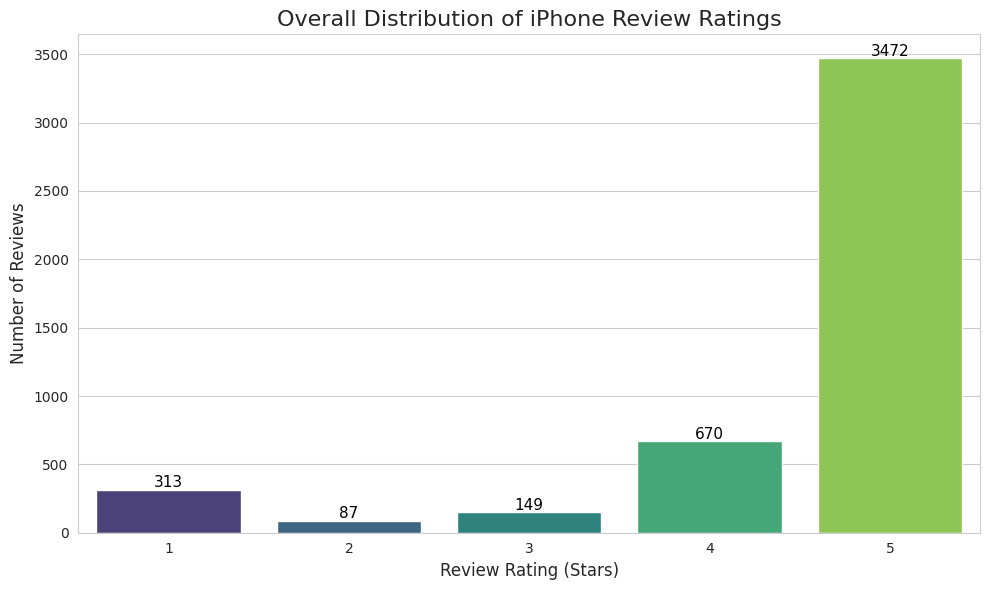

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- What is the overall rating distribution? ---

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

rating_counts = df['review_rating'].value_counts().sort_index()
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
ax.set_title('Overall Distribution of iPhone Review Ratings', fontsize=16)
ax.set_xlabel('Review Rating (Stars)', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-236075427.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rating = df_time['review_rating'].resample('M').mean()


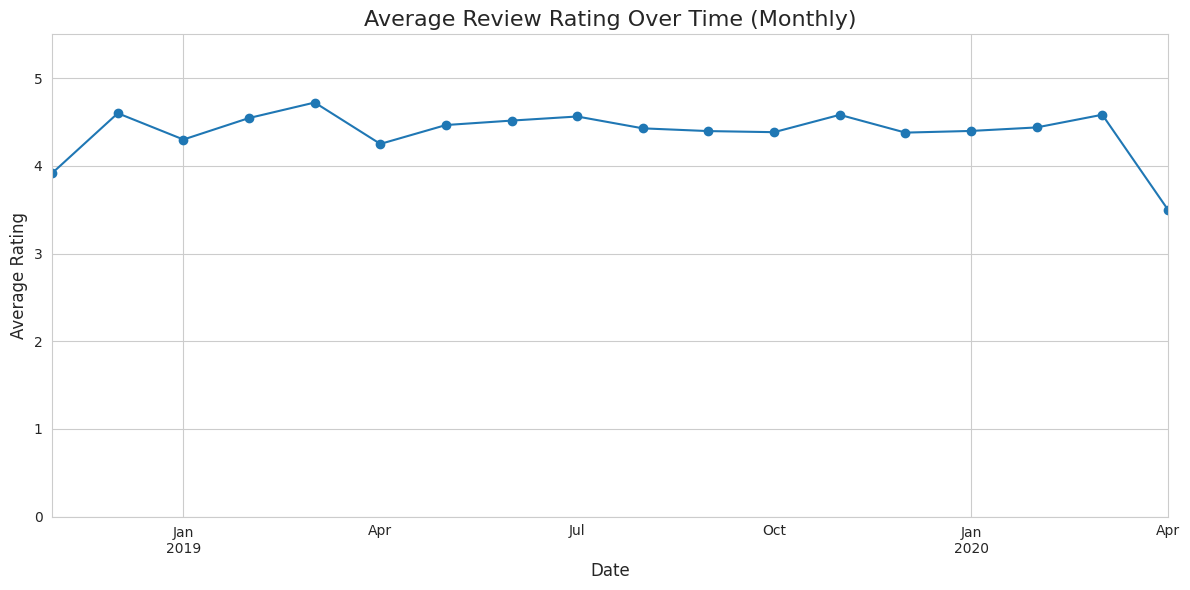

In [14]:
# --- Is there a trend over time? ---

df_time = df.copy()

df_time.set_index('reviewed_at', inplace=True)

monthly_avg_rating = df_time['review_rating'].resample('M').mean()

plt.figure(figsize=(12, 6))
monthly_avg_rating.plot(kind='line', marker='o', linestyle='-')
plt.title('Average Review Rating Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 5.5)
plt.grid(True)
plt.tight_layout()
plt.show()


A sudden dip is observed in April 2020. It can be either due to less responses in April with bias towards negative response or decent enough negative responses in April. This needs to be further examined.



/tmp/ipython-input-1873446420.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.set_index('reviewed_at').resample('M').size()


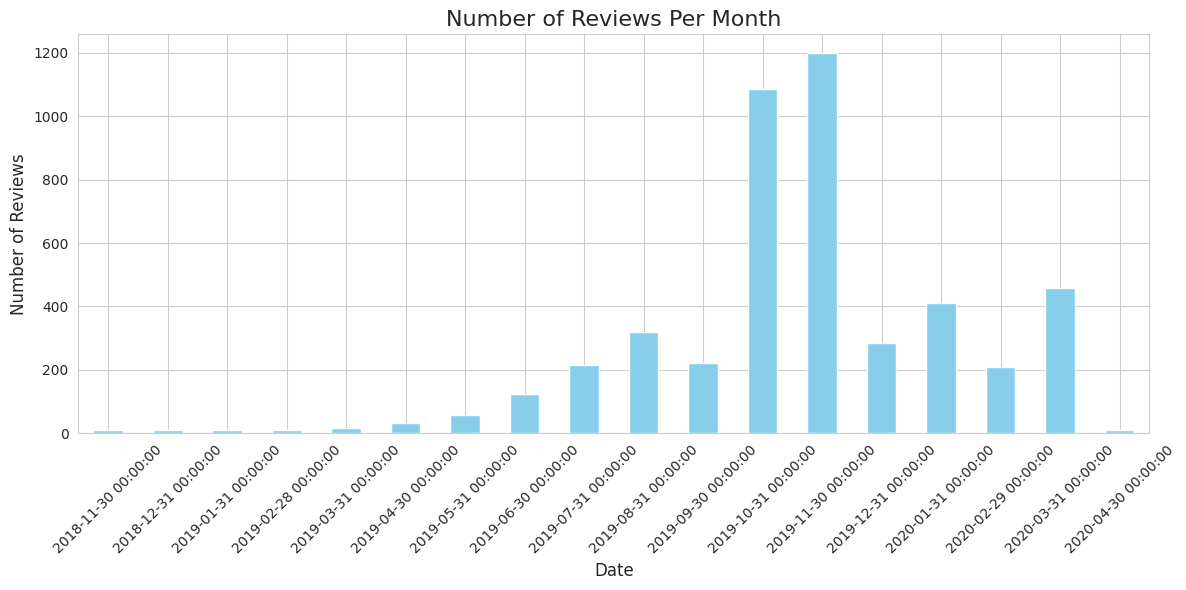

In [15]:
# Checking for number of responses
import matplotlib.pyplot as plt
import seaborn as sns

monthly_counts = df.set_index('reviewed_at').resample('M').size()
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews Per Month', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
april_2020_df = df[(df['reviewed_at'].dt.year == 2020) & (df['reviewed_at'].dt.month == 4)].copy()

print(f"Found {len(april_2020_df)} reviews for April 2020.")

# Checking the rating distribution for that month
print("\nRating distribution for April 2020:")
print(april_2020_df['review_rating'].value_counts().sort_index())


Found 12 reviews for April 2020.

Rating distribution for April 2020:
review_rating
1    4
3    1
5    7
Name: count, dtype: int64


The former hypothesis was correct: the dip is due to low number of responses, biased towards negative reviews. The sharp rating dip in April 2020 is a statistical outlier and should not be interpreted as a widespread product or service failure. It was caused by a very low review volume , which made the average rating highly susceptible to a small, diverse set of negative reviews.

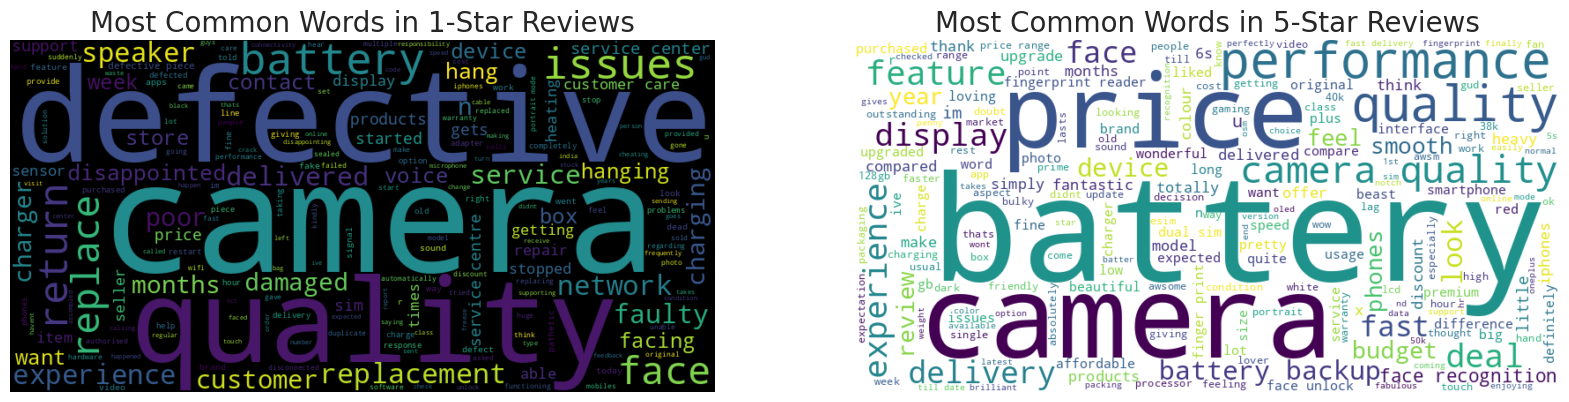

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
stop_words = list(text.ENGLISH_STOP_WORDS)

custom_stop_words = [
'iphone', 'phone', 'apple', 'xr', 'product', 'mobile',
'good', 'got', 'buy', 'amazon', 'dont','received','like','excellent','amazing','super','superb'
,'perfect','great','awesome','best','really','use','using','happy','love','loved','nice','better',
'worth','money','android','user','used', 'screen', 'ios', 'id','day','thanks', 'thing', 'bit',
'far','overall','works','need','genuine', 'satisfied','bought','sale','buying','purchase','say'
,'time','value','bad' ,'problem','worst','customer days','issue','doesnt','properly','days','life','new','month','working','issue','problem',' issue','issue ']

stop_words.extend(custom_stop_words)

one_star_text = " ".join(review for review in df[df['review_rating'] == 1]['cleaned_review_text'])
five_star_text = " ".join(review for review in df[df['review_rating'] == 5]['cleaned_review_text'])

wordcloud_1star = WordCloud(stopwords=stop_words, background_color="black", width=800, height=400).generate(one_star_text)
wordcloud_5star = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(five_star_text)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(wordcloud_1star, interpolation='bilinear')
ax1.set_title('Most Common Words in 1-Star Reviews', fontsize=20)
ax1.axis('off')

ax2.imshow(wordcloud_5star, interpolation='bilinear')
ax2.set_title('Most Common Words in 5-Star Reviews', fontsize=20)
ax2.axis('off')

plt.show()


*   The key negative reviews revolve around charger, voice, replacement and after sales service.
*   The key positive reviews include fingerprint, display and a comfortable price point.
*   Battery and camera are included in both the top negative and positive reviews, meaning they're the primary source of delight or frustration among customers.
*   The iPhone XR's success hinges on its ability to deliver a premium camera and battery experience.

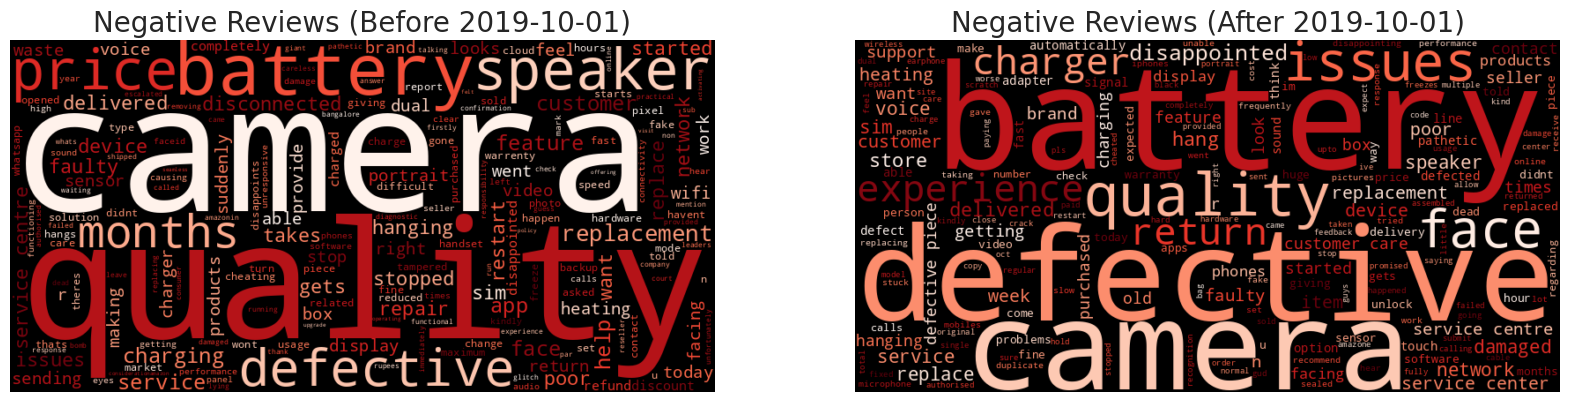

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text

stop_words = list(text.ENGLISH_STOP_WORDS)
custom_stop_words = [
'iphone', 'phone', 'apple', 'xr', 'product', 'mobile',
'good', 'got', 'buy', 'amazon', 'dont','received','like','excellent','amazing','super','superb'
,'perfect','great','awesome','best','really','use','using','happy','love','loved','nice','better',
'worth','money','android','user','used', 'screen', 'ios', 'id','day','thanks', 'thing', 'bit',
'far','overall','works','need','genuine', 'satisfied','bought','sale','buying','purchase','say'
,'time','value','bad' ,'problem','worst','customer days','issue','doesnt','properly','days','life','new','month','working','issue','problem',' issue','issue ']
stop_words.extend(custom_stop_words)

first_review_date = df['reviewed_at'].min()
cutoff_date = first_review_date + pd.DateOffset(months=11)

early_negative_df = df[(df['reviewed_at'] < cutoff_date) & (df['review_rating'] <= 2)]
late_negative_df = df[(df['reviewed_at'] >= cutoff_date) & (df['review_rating'] <= 2)]

early_text = " ".join(review for review in early_negative_df['cleaned_review_text'])
late_text = " ".join(review for review in late_negative_df['cleaned_review_text'])


if early_text:
    wordcloud_early = WordCloud(stopwords=stop_words, background_color="black", colormap="Reds", width=800, height=400).generate(early_text)
if late_text:
    wordcloud_late = WordCloud(stopwords=stop_words, background_color="black", colormap="Reds", width=800, height=400).generate(late_text)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

if early_text:
    ax1.imshow(wordcloud_early, interpolation='bilinear')
    ax1.set_title(f'Negative Reviews (Before {cutoff_date.date()})', fontsize=20)
else:
    ax1.text(0.5, 0.5, 'No negative reviews in this period', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax1.axis('off')

if late_text:
    ax2.imshow(wordcloud_late, interpolation='bilinear')
    ax2.set_title(f'Negative Reviews (After {cutoff_date.date()})', fontsize=20)
else:
    ax2.text(0.5, 0.5, 'No negative reviews in this period', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax2.axis('off')

plt.show()

The initial disappointment was with camera, battery and speaker, after that moving towards long-term issues related to working, return and charger. The theme shifted from manufacturing defects towards long-term reliability

In [19]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00


/tmp/ipython-input-1274354006.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')


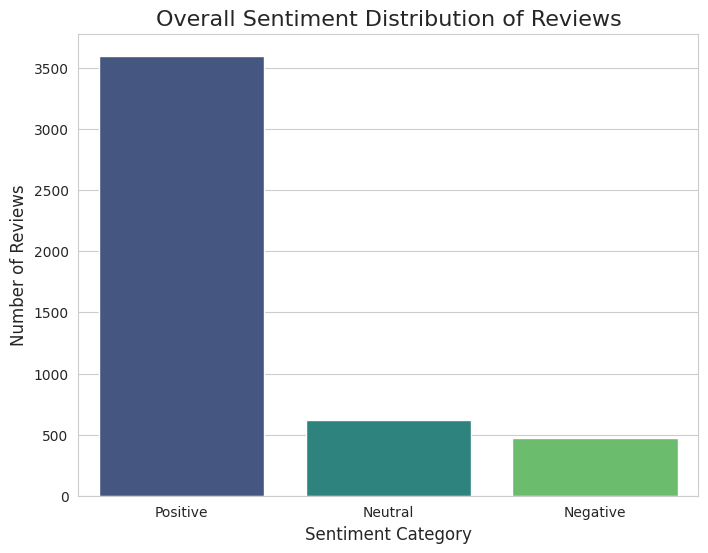

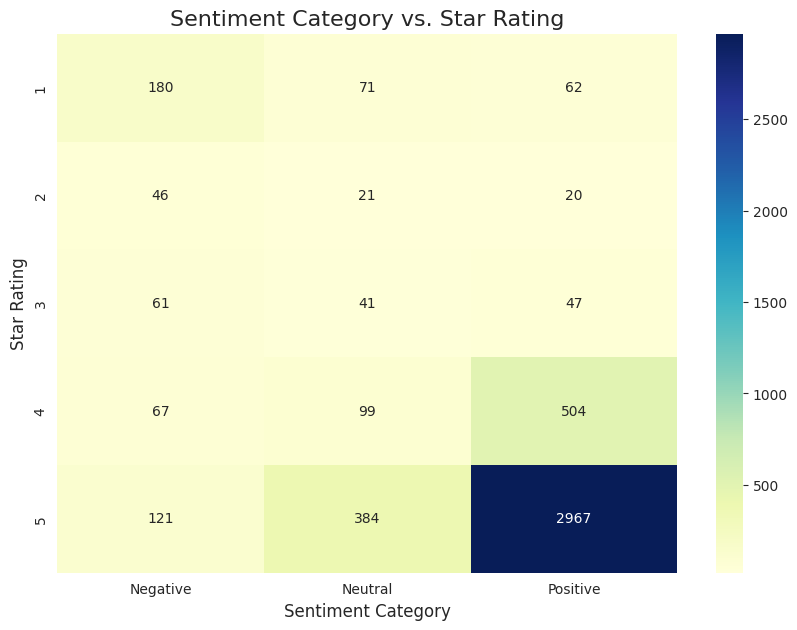

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['review_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(classify_sentiment)

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Overall Sentiment Distribution of Reviews', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

sentiment_rating_crosstab = pd.crosstab(df['review_rating'], df['sentiment_category'])
plt.figure(figsize=(10, 7))
sns.heatmap(sentiment_rating_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Sentiment Category vs. Star Rating', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)
plt.show()

/tmp/ipython-input-3233168651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=helpful_reviews_df, order=['Positive', 'Neutral', 'Negative'], palette='plasma')


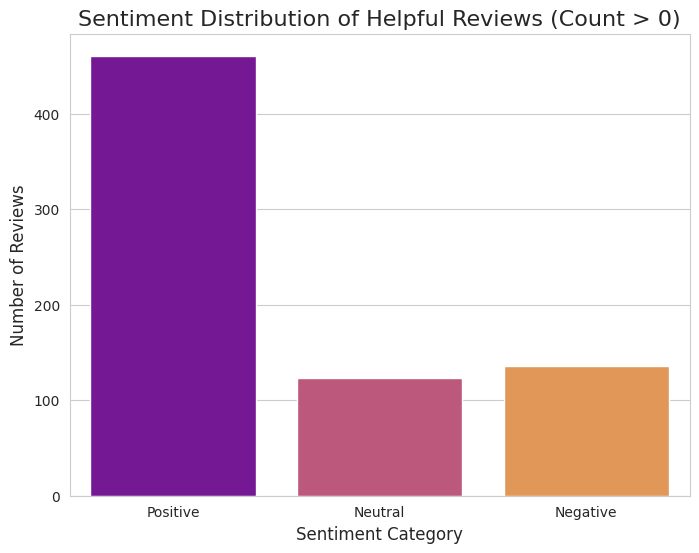

Average sentiment score of helpful reviews: 0.33
Average sentiment score of less helpful reviews: 0.44


In [21]:
helpful_reviews_df = df[df['helpful_count'] > 0].copy()
less_helpful_reviews_df = df[df['helpful_count'] == 0].copy()

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=helpful_reviews_df, order=['Positive', 'Neutral', 'Negative'], palette='plasma')
plt.title('Sentiment Distribution of Helpful Reviews (Count > 0)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

if not helpful_reviews_df.empty:
    avg_sentiment_helpful = helpful_reviews_df['sentiment_score'].mean()
    print(f"Average sentiment score of helpful reviews: {avg_sentiment_helpful:.2f}")
else:
    print("No helpful reviews found.")

if not less_helpful_reviews_df.empty:
    avg_sentiment_unhelpful = less_helpful_reviews_df['sentiment_score'].mean()
    print(f"Average sentiment score of less helpful reviews: {avg_sentiment_unhelpful:.2f}")
else:
    print("No less helpful reviews found.")

This showcases that customers customers value authenticity and detailed critical feedback.

In [22]:
!pip install nltk

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

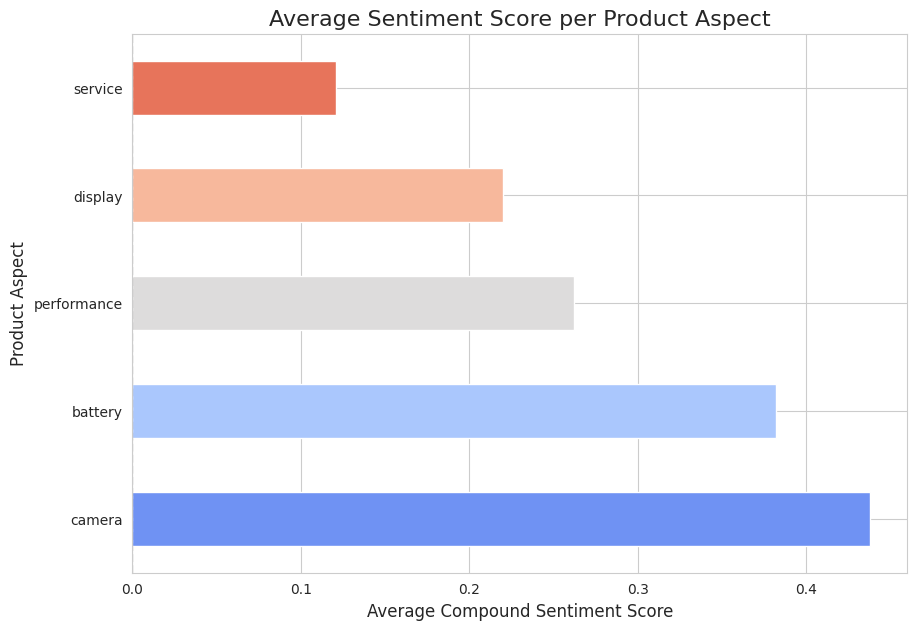

In [24]:
import nltk
aspect_keywords = {
    'battery': ['battery', 'charge', 'charging'],
    'camera': ['camera', 'photo', 'picture', 'video'],
    'performance': ['performance', 'speed', 'fast', 'slow', 'lag'],
    'display': ['display', 'screen', 'bright'],
    'service': ['service', 'delivery', 'return', 'replacement']
}

def get_aspect_sentiments(review_text):
    sentences = nltk.sent_tokenize(review_text)
    aspect_sentiments = {}

    for aspect, keywords in aspect_keywords.items():
        aspect_sentences = [sent for sent in sentences if any(key in sent.lower() for key in keywords)]
        if aspect_sentences:
            sentiment_sum = sum(analyzer.polarity_scores(sent)['compound'] for sent in aspect_sentences)
            aspect_sentiments[aspect] = sentiment_sum / len(aspect_sentences)
    return aspect_sentiments

aspect_data = helpful_reviews_df['review_text'].apply(get_aspect_sentiments).apply(pd.Series)

avg_aspect_sentiments = aspect_data.mean().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
avg_aspect_sentiments.plot(kind='barh', color=sns.color_palette("coolwarm", len(avg_aspect_sentiments)))
plt.title('Average Sentiment Score per Product Aspect', fontsize=16)
plt.xlabel('Average Compound Sentiment Score', fontsize=12)
plt.ylabel('Product Aspect', fontsize=12)
plt.axvline(0, color='black', linestyle='--')
plt.show()

Service lags significantly behind other features, having greater room for improvement

In [25]:
!pip install pandas transformers torch

In [26]:
from transformers import pipeline
absa_pipeline = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Define the aspects you want to analyze for a phone
aspects = ["camera", "battery", "screen", "performance", "price","return"]

def get_aspect_sentiments(review):
    sentiments = {}
    for aspect in aspects:
        if aspect in review.lower():
            result = absa_pipeline(review)
            sentiments[aspect] = result[0]['label']
        else:
            sentiments[aspect] = "Not Mentioned"
    return sentiments

df['aspect_sentiments'] = df['review_text'].apply(get_aspect_sentiments)

print("\nData with Aspect-Based Sentiments:")
df.head()

Device set to use cpu



Data with Aspect-Based Sentiments:


,index,helpful_count,total_comments,reviewed_at,review_text,review_rating,review_title,cleaned_review_text,cleaned_review_title,sentiment_score,sentiment_category,aspect_sentiments
0,0,5087,24,2018-12-12,NOTE:,3,"Which iPhone you should Purchase ? iPhone 8, X...",note,iphone purchase iphone 8 x xs xr,0.0000,Neutral,"{'camera': 'Not Mentioned', 'battery': 'Not Me..."
1,1,2822,6,2018-11-17,Very bad experience with this iPhone xr phone....,1,Don't buy iPhone xr from Amazon.,bad experience iphone xr phone back camera fou...,dont buy iphone xr amazon,-0.8685,Negative,"{'camera': '1 star', 'battery': 'Not Mentioned..."
2,2,1798,0,2019-01-27,Amazing phone with amazing camera coming from ...,5,Happy with the purchase,amazing phone amazing camera coming iphone 7 p...,happy purchase,0.9246,Positive,"{'camera': '5 stars', 'battery': 'Not Mentione..."
3,3,1366,14,2019-05-02,So I got the iPhone XR just today. The product...,1,Amazon is not an apple authorised reseller. Pl...,got iphone xr today product looks amazing unfo...,amazon apple authorised reseller please take note,0.5113,Positive,"{'camera': '2 stars', 'battery': 'Not Mentione..."
4,4,536,5,2019-05-24,I've been an android user all my life until I ...,5,Excellent Battery life and buttery smooth UI,ive android user life decided try iphone xr io...,excellent battery life buttery smooth ui,0.9631,Positive,"{'camera': '5 stars', 'battery': '5 stars', 's..."


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['review_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
df['topic'] = lda.fit_transform(X).argmax(axis=1)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("\nTop Words for Each Topic:")
display_topics(lda, vectorizer.get_feature_names_out(), 10)

print("\nData with Topic Numbers:")
df.head()


Top Words for Each Topic:
Topic 0:
product phone awesome apple excellent amazing amazon mobile just money
Topic 1:
best phone iphone got price amazon apple superb xr sale
Topic 2:
battery iphone camera life good quality xr phone better display
Topic 3:
good phone product great worth buy price love perfect working
Topic 4:
nice phone face product apple android id like fingerprint fast

Data with Topic Numbers:


,index,helpful_count,total_comments,reviewed_at,review_text,review_rating,review_title,cleaned_review_text,cleaned_review_title,sentiment_score,sentiment_category,aspect_sentiments,topic
0,0,5087,24,2018-12-12,NOTE:,3,"Which iPhone you should Purchase ? iPhone 8, X...",note,iphone purchase iphone 8 x xs xr,0.0000,Neutral,"{'camera': 'Not Mentioned', 'battery': 'Not Me...",1
1,1,2822,6,2018-11-17,Very bad experience with this iPhone xr phone....,1,Don't buy iPhone xr from Amazon.,bad experience iphone xr phone back camera fou...,dont buy iphone xr amazon,-0.8685,Negative,"{'camera': '1 star', 'battery': 'Not Mentioned...",3
2,2,1798,0,2019-01-27,Amazing phone with amazing camera coming from ...,5,Happy with the purchase,amazing phone amazing camera coming iphone 7 p...,happy purchase,0.9246,Positive,"{'camera': '5 stars', 'battery': 'Not Mentione...",0
3,3,1366,14,2019-05-02,So I got the iPhone XR just today. The product...,1,Amazon is not an apple authorised reseller. Pl...,got iphone xr today product looks amazing unfo...,amazon apple authorised reseller please take note,0.5113,Positive,"{'camera': '2 stars', 'battery': 'Not Mentione...",4
4,4,536,5,2019-05-24,I've been an android user all my life until I ...,5,Excellent Battery life and buttery smooth UI,ive android user life decided try iphone xr io...,excellent battery life buttery smooth ui,0.9631,Positive,"{'camera': '5 stars', 'battery': '5 stars', 's...",4


In [28]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import torch

model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

max_input_length = 1024


topic_summaries = {}
for topic_num in range(5):
    print(f"Summarizing Topic {topic_num}...")

    topic_reviews = " ".join(df[df['topic'] == topic_num]['review_text'].tolist())

    if not topic_reviews.strip():
        topic_summaries[topic_num] = "No reviews found for this topic."
        continue

    inputs = tokenizer(
        topic_reviews,
        max_length=max_input_length,
        truncation=True,
        return_tensors="pt"
    )

    summary_ids = model.generate(
        inputs['input_ids'],
        num_beams=4,
        max_length=150,
        min_length=40,
        early_stopping=True
    )

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    topic_summaries[topic_num] = summary

print("\n Sophisticated Summaries for Each Topic:")
for topic_num, summary in topic_summaries.items():
    print(f"--- Summary for Topic {topic_num} ---")
    print(summary)
    print("\n")

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Summarizing Topic 0...
Summarizing Topic 1...
Summarizing Topic 2...
Summarizing Topic 3...
Summarizing Topic 4...

 Sophisticated Summaries for Each Topic:
--- Summary for Topic 0 ---
i bought it and received it on 3.10.2019 and noted a crack on right top corner of display which was visible when the plastic sticker was removed. They assured a replacement. nothing happened. when i called them a number of times, they simply tranfer my calls to diiferent sections and then assurinng call back and then not calling back. Within a month I have to visit customer care and still facing issues. Very worst experience don’t buy it from amazon.


--- Summary for Topic 1 ---
This is a product which lets down the whole high end feel of an iPhone. Apple has packed in a very sophisticated software hardware system in a rather disappointing design. The phone is bulkier and heavier than any of its competition in the market. The screen is not an OLED so you miss out on deep blacks and saturation.


--- Sum